### Group Members:

- Varun Ghat Ravikumar, matriculation number
- Shantam Raj, matriculation number
- Jorge Alejandro Ortiz Valerio, 23-743-958

# Assignment 1: Perceptron Learning

The goal of this exercise is to apply the perceptron learning to a total of $N=100$ automatically generated, separable random data $X=\bigl\{\vec x^1, \vec x^2,\ldots,\vec x^ N \bigr\}$ with each $\vec x^n = \bigl(x_1^n, x_2^n\bigr)^T$.
Each data point $\vec x^n$ is accompanied by an according target value $X=\bigl\{t^1, t^2,\ldots,t^ N\bigr\}$ with $t^n \in \{-1,+1\}$.

## Data Generation
The data should be generated such that
$\forall n\leq\frac N2\colon \vec x^n \sim \mathcal N_{\vec\mu_+, \sigma_+}$.
These samples will be our positive data labeled with $t^n=1$.
Similarly, we generate our negative data with
$\forall n>\frac N2\colon \vec x^n \sim \mathcal N_{\vec\mu_-, \sigma_-}$
and label them as $t^n=-1$.

### Task 1: Data Samples

Given the number of samples and the means (mu) and standard deviations (sigma) of positive (pos) and negative (neg) data, generate and return data samples including their labels. Remember to add the bias neuron $x_0=1$ to each of the samples.

Hints:
1. Use `numpy` package to generate data.
2. Exemplary means could be selected as: $\vec\mu_+=(-5,3)^T$ and $\vec\mu_- = (5, -3)^T$. The standard deviations $\sigma_+$ and $\sigma_-$ should be selected such that the data is most likely separable.

In [50]:
import numpy
import numpy as np

def dataset(number_of_samples, mu_pos, sigma_pos, mu_neg, sigma_neg):
  number_of_samples = int(number_of_samples/2)
  # create positive and negative data
  positive_data = np.random.normal(mu_pos, sigma_pos, size=(number_of_samples, len(mu_pos)))
  negative_data = np.random.normal(mu_neg, sigma_neg, size=(number_of_samples, len(mu_neg)))

  # assign positive and negative labels
  positive_labels = np.ones((number_of_samples, 1))
  negative_labels = -1*np.ones((number_of_samples, 1))

  # concatenate positive and negative data
  all_data = np.concatenate((positive_data, negative_data), axis=0)
  all_labels = np.concatenate((positive_labels, negative_labels), axis=0)

  # anything else to consider?
  all_data = np.concatenate((np.ones((number_of_samples*2, 1)), all_data), axis=1)

  # return both X and T
  return all_data, all_labels

### Task 2: Select Data Parameters and Line Parameters

We want to select data points such that we exactly know where the ideal separating line should be placed.
Note that data samples are not always separable since they are generated randomly.
You should determine, which means and standard deviations are useful.

Once you have defined your means, you should also define the separating line.
The easiest is to provide it as Cartesian equation: $w_0 + w_1 x_1 + w_2 x_2$.
Note that the separating line is orthogonal to the vector $\overrightarrow{\vec\mu_- \vec\mu_+}$, that the normal of the line $(w_1, w_2)^T$ is orthogonal to the line, and that $w_0$ should be selected such that the line $\vec w$ is in the middle of $\vec\mu_+$ and $\vec\mu_-$.

In [51]:
mu_pos=np.array([-5, 3])
sigma_pos=0.5
mu_neg=np.array([5,-3])
sigma_neg=0.5


X, T = dataset(100, mu_pos, sigma_pos, mu_neg, sigma_neg)
# I return T as a column vector, so we need to traspose it
T = T.T

w_manual = np.array([0, -1, -1])

In [54]:
X

array([[ 1.        , -4.49034418,  2.97574069],
       [ 1.        , -5.12000804,  2.63223054],
       [ 1.        , -4.50657794,  2.42533231],
       [ 1.        , -5.23399992,  3.49994434],
       [ 1.        , -5.80231314,  2.87523168],
       [ 1.        , -5.18130324,  2.73231176],
       [ 1.        , -5.31518095,  2.69276334],
       [ 1.        , -4.83462466,  2.8322418 ],
       [ 1.        , -5.56996619,  4.05957322],
       [ 1.        , -4.98171181,  3.07603103],
       [ 1.        , -4.68076949,  3.58935015],
       [ 1.        , -5.04007338,  2.60592457],
       [ 1.        , -5.20549825,  3.35737914],
       [ 1.        , -5.44593968,  3.23541488],
       [ 1.        , -4.78027771,  3.21052268],
       [ 1.        , -5.0294928 ,  3.18300409],
       [ 1.        , -4.18488894,  3.11132044],
       [ 1.        , -5.62913238,  3.71945403],
       [ 1.        , -4.32316403,  2.77677757],
       [ 1.        , -4.42498533,  3.08626056],
       [ 1.        , -5.40104319,  2.198

In [55]:
T.shape

(1, 100)

In [56]:
X.dot(w_manual)*T

array([[1.51460349, 2.4877775 , 2.08124562, 1.73405558, 2.92708146,
        2.44899149, 2.62241761, 2.00238286, 1.51039298, 1.90568078,
        1.09141934, 2.43414881, 1.84811911, 2.2105248 , 1.56975503,
        1.84648871, 1.0735685 , 1.90967835, 1.54638646, 1.33872477,
        3.20248586, 1.28968   , 2.66784631, 1.00497987, 1.54311912,
        3.08521713, 0.96913701, 0.91033982, 1.4381779 , 1.99589065,
        2.40579416, 2.86596191, 2.54213433, 2.36571322, 1.02682636,
        2.05652768, 1.62513203, 2.34467336, 2.55121341, 2.08128254,
        2.19599328, 2.26151538, 0.99903466, 2.02721929, 2.37200784,
        2.34361739, 1.2154335 , 2.1846648 , 2.35930747, 2.20043524,
        2.52101014, 2.43307704, 1.23775517, 1.36699667, 1.49204603,
        2.01924537, 1.74258181, 1.56976404, 1.93624984, 1.54018996,
        3.12463451, 1.51762423, 1.99194636, 2.4152817 , 3.25366986,
        1.2805249 , 0.98124767, 1.33584927, 2.51685848, 0.2529744 ,
        2.24164301, 1.8995725 , 2.07261523, 1.76

### Test 1: Linear Separability Test

A line $a = f_{\vec w}(\vec x) = w_0 + w_1 x_1 + w_2 x_2$ linearly separates the data $(X,T)$ if $\forall n: a^{[n]} t^{[n]} > 0$ for $a^{[n]} = f_{\vec w}(\vec x^{[n]})$.
The below function implements this linear separability test. We apply this test to your data $(X,T)$ from Task 1 and your manually selected line $\vec w$ from Task 2 to assure that the line separates the data.

In [68]:
def separability_test(X, T, w):
  print(np.dot(X,w) * T)
  return numpy.all(numpy.dot(X,w) * T > 0)

# Test 1: check that the weights are separating the data
if separability_test(X, T, w_manual):
  print("The data is separated by the manually selected line")
else:
  print("The anually selected line does not separate the data")

[[1.51460349 2.4877775  2.08124562 1.73405558 2.92708146 2.44899149
  2.62241761 2.00238286 1.51039298 1.90568078 1.09141934 2.43414881
  1.84811911 2.2105248  1.56975503 1.84648871 1.0735685  1.90967835
  1.54638646 1.33872477 3.20248586 1.28968    2.66784631 1.00497987
  1.54311912 3.08521713 0.96913701 0.91033982 1.4381779  1.99589065
  2.40579416 2.86596191 2.54213433 2.36571322 1.02682636 2.05652768
  1.62513203 2.34467336 2.55121341 2.08128254 2.19599328 2.26151538
  0.99903466 2.02721929 2.37200784 2.34361739 1.2154335  2.1846648
  2.35930747 2.20043524 2.52101014 2.43307704 1.23775517 1.36699667
  1.49204603 2.01924537 1.74258181 1.56976404 1.93624984 1.54018996
  3.12463451 1.51762423 1.99194636 2.4152817  3.25366986 1.2805249
  0.98124767 1.33584927 2.51685848 0.2529744  2.24164301 1.8995725
  2.07261523 1.76758462 1.20213601 2.19204473 1.91154419 2.35826835
  1.02288304 1.41501775 1.55074652 3.03351184 2.32616476 1.79078648
  3.07766711 2.20977899 0.98088094 3.21245746 0.918

### Task 3: Perceptron

The perceptron is defined as the Adaline $$a = f_{\vec w}(\vec x)$$ that is thresholded using the sign function $$\mathrm{sign}(a) = \begin{cases} +1 &\text{if } a \geq 0\\ -1 & \text{otherwise.}\end{cases}$$
Implement a function that computes and returns the perceptron for a given data point $\vec x$ and line parameters $\vec w$.

In [104]:
def perceptron(x, w):
  activation = np.dot(x,w)
  if activation>=0:
    return 1
  return -1

## Perceptron Learning

The perceptron learning rule is defined as follows.
First, the weights $\vec w = (w_0, w_1, w_2)^T$ are initialized randomly.
Then, for each sample $(x,t)$ of the dataset we check if the sample is correctly classified as $H(f_{\vec w}(\vec x)) t > 0$.
If the sample is classified incorrectly, the weights are adapted: $w_0 = w_0 + t$, $w_1 = w_1 + tx_1$, $w_2 = w_2 + tx_2$.
This step is repeated until all samples are classified correctly.


### Task 4: Perceptron Learning Implementation

Implement a function that performs perceptron learning for a given dataset $(X,T)$ and a given initial weight vector $\vec w$.
The final weight vector $\vec w^*$ shall be returned from that function.
Define a proper stopping criterion for the iteration.
Consider in your implementation error cases that could arise.


In [141]:
def perceptron_learning(X, T, w):
  # first, make a copy of your weights
  w_star = w.copy()

  # then, iterate over the data and perform perceptron learning
  # Adding epoch iterations
  max_epoch = 10
  epoch = 0
  while not separability_test(X, T, w_star) and epoch<max_epoch:
      for i in range(X.shape[0]):
        result = perceptron(X[i,:], w_star)
        expected = T[:, i]
        if result != expected:
            w_star = w_star + (T@X).reshape(3)
      epoch+=1

  # finally, return the optimal weights
  return w_star

### Test 2: Sanity Check

We call the perceptron learning function with the data from task 1 and the manual line from task 2. If the line separates the data, it should not be changed. Here we test if this is the actual outcome of the perceptron learning function.

In [142]:
w_star = perceptron_learning(X, T, w_manual)

# check if the output is as expected
if numpy.any(w_manual != w_star):
    print("Warning: the perceptron algorithm seems to be wrong")
else:
    print("As desired, perceptron learning does not optimize an already separating line")

[[1.51460349 2.4877775  2.08124562 1.73405558 2.92708146 2.44899149
  2.62241761 2.00238286 1.51039298 1.90568078 1.09141934 2.43414881
  1.84811911 2.2105248  1.56975503 1.84648871 1.0735685  1.90967835
  1.54638646 1.33872477 3.20248586 1.28968    2.66784631 1.00497987
  1.54311912 3.08521713 0.96913701 0.91033982 1.4381779  1.99589065
  2.40579416 2.86596191 2.54213433 2.36571322 1.02682636 2.05652768
  1.62513203 2.34467336 2.55121341 2.08128254 2.19599328 2.26151538
  0.99903466 2.02721929 2.37200784 2.34361739 1.2154335  2.1846648
  2.35930747 2.20043524 2.52101014 2.43307704 1.23775517 1.36699667
  1.49204603 2.01924537 1.74258181 1.56976404 1.93624984 1.54018996
  3.12463451 1.51762423 1.99194636 2.4152817  3.25366986 1.2805249
  0.98124767 1.33584927 2.51685848 0.2529744  2.24164301 1.8995725
  2.07261523 1.76758462 1.20213601 2.19204473 1.91154419 2.35826835
  1.02288304 1.41501775 1.55074652 3.03351184 2.32616476 1.79078648
  3.07766711 2.20977899 0.98088094 3.21245746 0.918

### Task 5: Weight Initialization

Implement a function that generates and returns randomly initialized weights $\vec w \in [-1,1]^3$.

In [143]:
def random_weights(lowest = -1, highest = 1):
  return np.random.uniform(lowest, highest, size=(3,))

### Task 6: Perceptron Learning Execution

Call the perceptron learning function with the data from task 1 and the randomly generated initial weight vector from task 5.
Store the resulting weight vector $\vec w^*$.

In [144]:
# create random weights
w_initial = random_weights()

# perform perceptron learning
w_star = perceptron_learning(X, T, w_initial)

w_initial

[[-1.96786728 -2.80459466 -2.38099687 -2.28372757 -3.26644606 -2.78950756
  -2.94319793 -2.39331777 -2.19302812 -2.35449001 -1.70214441 -2.74892343
  -2.36017418 -2.67302699 -2.06902811 -2.32179219 -1.58442096 -2.49422892
  -1.95550954 -1.82688679 -3.38075271 -1.82110681 -2.92549413 -1.45530312
  -2.02418581 -3.33995628 -1.65498512 -1.65663334 -1.94974231 -2.45174244
  -2.76663379 -3.14552344 -2.91241054 -2.78427127 -1.67218393 -2.45274248
  -2.03569856 -2.68542714 -3.02358732 -2.6474376  -2.69518835 -2.69377557
  -1.72439876 -2.34935225 -2.74893794 -2.65438171 -1.75332668 -2.60464657
  -2.76418142 -2.51226564 -2.96165431 -2.85884847 -2.00594903 -2.04898021
  -2.12233103 -2.70528767 -2.35641489 -2.15775593 -2.51442536 -2.20510907
  -3.57677762 -2.18615074 -2.58031688 -2.87326264 -3.72676535 -2.0055992
  -1.75879342 -2.15136504 -2.98431175 -1.2103752  -2.7725179  -2.51106828
  -2.66493372 -2.43483173 -1.9373478  -2.75246649 -2.52346425 -2.82373454
  -1.84875966 -2.05826093 -2.11450861 -

array([0.07638037, 0.93440316, 0.7230281 ])

### Test 3: Result Validation

We verify that the optimized $\vec w^*$ actually separates the data.

In [145]:
# verify that we have learned to separate the data
if separability_test(X, T, w_star):
  print("The data is separated by the optimal line")
else:
  print("The optimal line does not separate the data")

[[3170.62617906 3377.83120702 3006.98722147 3705.50088274 3794.32967738
  3439.66431105 3494.16904922 3297.74914279 4047.8702109  3447.25947255
  3457.17059488 3329.71160042 3646.78525481 3728.78090659 3388.6490959
  3504.49540548 3060.41761513 3971.28413679 3025.07056163 3172.47816207
  3382.83243756 3301.70670912 3285.96539522 2776.56985152 3298.76093515
  3588.28097336 3653.67463292 3841.52342448 3337.00216522 3542.04633841
  3485.22835031 3518.87901192 3623.85195214 3676.66747884 3541.58745281
  3358.6824268  3089.75543852 3362.22512071 4022.55732434 4029.56477586
  3858.7064763  3650.999807   3827.80625112 3052.31773529 3521.61282553
  3246.32214059 3270.76158136 3546.1498346  3619.33190263 3142.87243511
  3291.58122631 3168.44949032 3584.99932601 3351.16538712 3246.6509939
  3856.63712797 3371.67592832 3142.68806564 3380.27065964 3415.74871476
  3789.09006182 3412.64642121 3461.23529294 3278.71494762 3966.42872915
  3451.61514101 3428.23672831 3840.31393339 3391.36555896 3571.588

## Visualization

We have selected our data to be 2-dimensional to be able to visualize the results.
For this purpose, we would like to jointly plot the positive and the negative data from Task 1 together with the decision boundaries of the weight vectors obtained in Tasks 2 and 6.
An example can be found in the exercise slides.

### Task 7: Plotting

First, we need to plot the data points such that positive data are plotted with green dots, and negative data with red dots.

Then, we need to compute the line parameters. For this purpose, we define the separating line in Cartesian coordinates $f_{\vec w}(\vec x) = 0$ and solve it to the parametric form $x_2 = \beta x_1 + \gamma$.

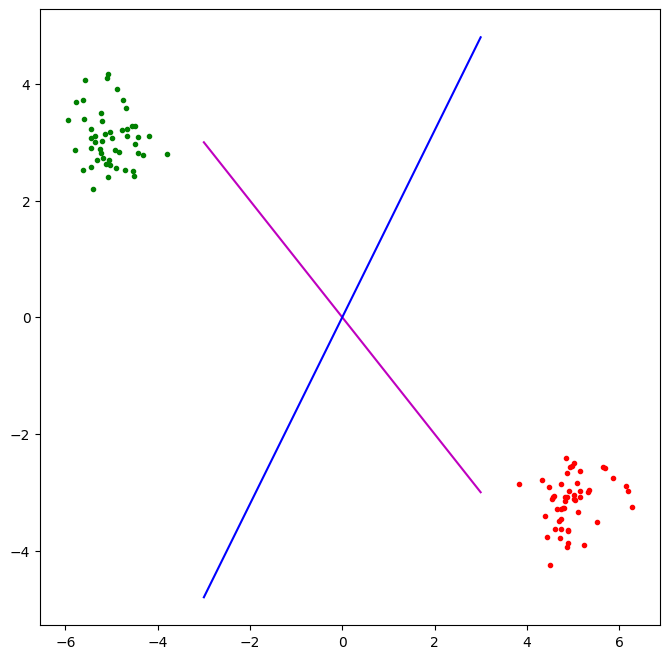

In [147]:
def line_parameters(w):
  # compute parametric line parameters from Cartesian coordinates
  beta = -1*(w[1]/w[2])
  gamma = -1*(w[0]/w[2])
  return beta, gamma


from matplotlib import pyplot

# create a square plot
pyplot.figure(figsize=(8,8))

# plot the positive data points
pyplot.plot(X[:50,1], X[:50, 2], "g.", label="positive data")
# plot the negative data points
pyplot.plot(X[50:,1], X[50:,2], "r.", label="negative data")

# define positions where to evaluate the line:
x1 = np.array([-3,3])

# compute line parameters for manual line
beta, gamma = line_parameters(w_manual)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot manual line
pyplot.plot(x1, x2, "m-", label="manual line")

# compute line parameters for optimized line
beta, gamma = line_parameters(w_star)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot optimized line
pyplot.plot(x1, x2, "b-", label="optimized line")

# make the plot more beautiful
pyplot.show()